ValueError: num must be an integer with 1 <= num <= 6, not 7

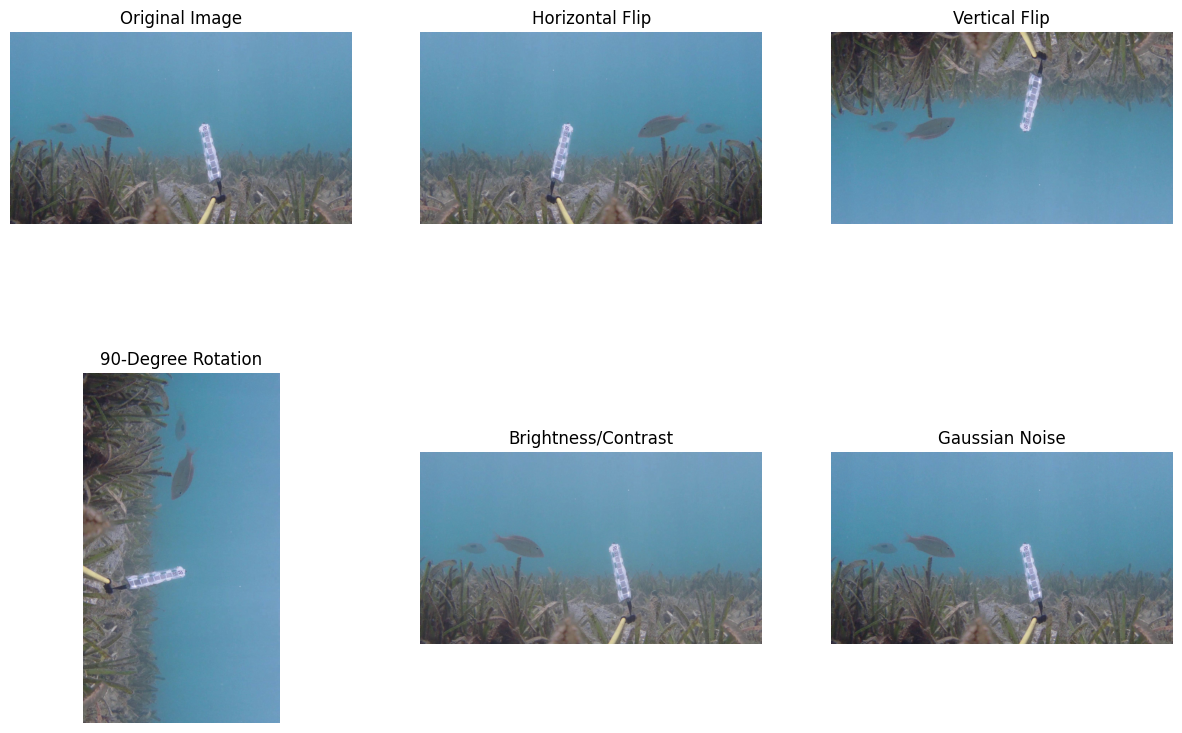

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display original and augmented images side by side
def display_augmented_images(original, augmented_list, titles):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    for i, (aug_img, title) in enumerate(zip(augmented_list, titles), start=2):
        plt.subplot(2, 3, i)
        plt.imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the underwater image
image_path = 'image.jpg'  # Update this with your image path
image = cv2.imread(image_path)

# Define augmentations manually
def horizontal_flip(img):
    return cv2.flip(img, 1)

def vertical_flip(img):
    return cv2.flip(img, 0)

def random_rotate_90(img):
    return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

def random_brightness_contrast(img, brightness=0.2, contrast=0.2):
    beta = np.random.uniform(-brightness * 255, brightness * 255)
    alpha = np.random.uniform(1 - contrast, 1 + contrast)
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

def add_gaussian_noise(img, var_limit=(10.0, 50.0)):
    row, col, ch = img.shape
    mean = 0
    var = np.random.uniform(var_limit[0], var_limit[1])
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch)).astype(np.float32)
    noisy = cv2.add(img.astype(np.float32), gauss)
    return np.clip(noisy, 0, 255).astype(np.uint8)

def gaussian_blur(img, ksize=(3, 7)):
    k = np.random.choice(range(ksize[0], ksize[1]+1, 2))
    return cv2.GaussianBlur(img, (k, k), 0)

# Apply augmentations
augmented_images = [
    horizontal_flip(image),
    vertical_flip(image),
    random_rotate_90(image),
    random_brightness_contrast(image),
    add_gaussian_noise(image),
    gaussian_blur(image)
]

titles = [
    "Horizontal Flip",
    "Vertical Flip",
    "90-Degree Rotation",
    "Brightness/Contrast",
    "Gaussian Noise",
    "Gaussian Blur"
]

# Display the original and augmented images
display_augmented_images(image, augmented_images, titles)
